<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Paper in Journal of Coastal and Hydraulic Structures
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Demonstrating the effect of the sampling strategy

#### Packages

In [53]:
# General packages
from scipy import signal
from matplotlib import pyplot as plt
import pandas as pd

# Project package
from hvec_importers import rws
import hvec_tide as tide

s:\JCHS_sea_level\.venv\Lib\site-packages\utide\harmonics.py:16: RuntimeWarning: invalid value encountered in cast
  nshallow = np.ma.masked_invalid(const.nshallow).astype(int)
s:\JCHS_sea_level\.venv\Lib\site-packages\utide\harmonics.py:17: RuntimeWarning: invalid value encountered in cast
  ishallow = np.ma.masked_invalid(const.ishallow).astype(int) - 1


#### Import high-frequency data Den Helder for one year

In [40]:
df = rws.data_single_name(name = 'Den Helder', quantity = 'WATHTE', start = '2020-01-01', end = '2020-12-31', reduce = False)
df = df[['Tijdstip', 'Waarde']]
df['Waarde'] = df['Waarde'].div(100)

100%|██████████| 2/2 [00:26<00:00, 13.14s/it]


#### Sample highs and lows

In [41]:
# Sample highs and lows
dist = 50 # Horizontal distance between peaks
# Add column with default values
df['high_low'] = False

# Add high waters
ids = signal.find_peaks(df['Waarde'], distance = dist)[0]
df['high_low'].iloc[ids] = True

# Add low waters
ids = signal.find_peaks(-df['Waarde'], distance = dist)[0]
df['high_low'].iloc[ids] = True

C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_20160\1373455363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_low'].iloc[ids] = True
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_20160\1373455363.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_low'].iloc[ids] = True


In [42]:
smpl = df.loc[df['high_low']]

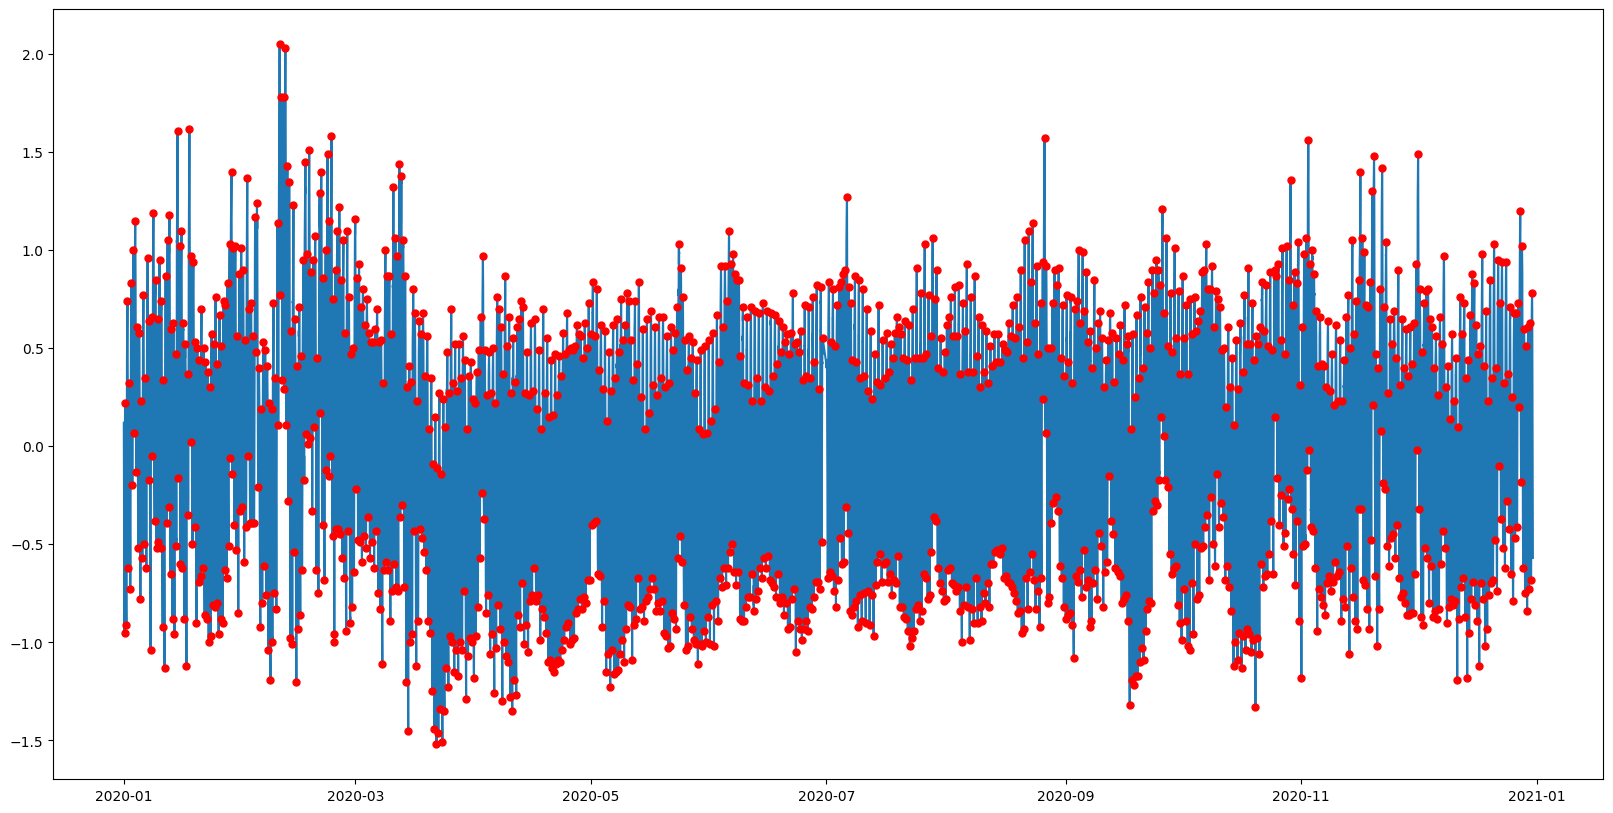

In [43]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(df['Tijdstip'], df['Waarde'])
ax.plot(smpl['Tijdstip'], smpl['Waarde'], 'ro', markersize = 5);


#### Sample three hourly and hourly

In [44]:
df['smpl_3hr'] = (df['Tijdstip'].dt.hour%3 == 0) & (df['Tijdstip'].dt.minute == 0)
df['smpl_1hr'] = (df['Tijdstip'].dt.hour%1 == 0) & (df['Tijdstip'].dt.minute == 0)
df['smpl_10min'] = df['Tijdstip'].dt.minute%10 == 0
df

,Tijdstip,Waarde,high_low,smpl_3hr,smpl_1hr,smpl_10min
0,2020-01-01 01:00:00+01:00,0.12,False,False,True,True
1,2020-01-01 01:10:00+01:00,0.06,False,False,False,True
2,2020-01-01 01:20:00+01:00,-0.01,False,False,False,True
3,2020-01-01 01:30:00+01:00,-0.09,False,False,False,True
4,2020-01-01 01:40:00+01:00,-0.15,False,False,False,True
...,...,...,...,...,...,...
53627,2020-12-31 00:20:00+01:00,-0.48,False,False,False,True
53628,2020-12-31 00:30:00+01:00,-0.51,False,False,False,True
53629,2020-12-31 00:40:00+01:00,-0.53,False,False,False,True
53630,2020-12-31 00:50:00+01:00,-0.55,False,False,False,True


#### Arithmetic means

In [54]:
res = pd.DataFrame(columns = ['Sampling_method', 'Arithmetic_mean'])

methods = ['high_low', 'smpl_3hr', 'smpl_1hr', 'smpl_10min']
for meth in methods:
    tmp = pd.DataFrame()
    mean = df.loc[df[meth], 'Waarde'].mean()
    tmp['Sampling_method'] = [meth]
    tmp['Arithmetic_mean'] = [mean]
    res = pd.concat([res, tmp])
res


,Sampling_method,Arithmetic_mean
0,high_low,-0.037171
0,smpl_3hr,0.069313
0,smpl_1hr,0.069326
0,smpl_10min,0.069545


In [55]:
res.set_index(keys = 'Sampling_method', inplace = True)
#fig, ax = plt.figure(figsize = (20, 8))
res

,Arithmetic_mean
Sampling_method,
high_low,-0.037171
smpl_3hr,0.069313
smpl_1hr,0.069326
smpl_10min,0.069545


#### Tidal means

In [58]:
sol = tide.run_utide_solve(df['Tijdstip'], df['Waarde'], lat = 52)
coef = tide.parsers.parse_utide(sol)

In [59]:
coef

,z0,zmean,count,M2_ampl,S2_ampl,M4_ampl,N2_ampl,SSA_ampl,O1_ampl,L2_ampl,...,ETA2_g_ci,J1_g_ci,S4_g_ci,SK3_g_ci,2SK5_g_ci,Rsq_adj,MHWS,MLWS,MHWN,MLWN
0,0.069921,0.065949,53632.0,0.634882,0.174883,0.108675,0.099576,0.096994,0.094439,0.082918,...,133.485181,116.04624,193.504817,225.780885,421.643115,-1.0,0.879686,-0.739844,0.52992,-0.390078


#### End script
Prepared by HVEC lab, 2022